In [1]:
# Read the CSV file into a pandas dataframe 
import numpy as np 
import pandas as pd 
df = pd.read_csv("C:\\Users\\Anindita\\Pandas\\churn.csv")

In [3]:
# Shape of a dataframe is a tuple of array dimensions which defines the number of rows and columns of a given dataframe
df.shape

(10000, 14)

In [4]:
# to check the df columns in Pandas
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
# drop the columns from the pandas df by using drop() function
df.drop(['RowNumber', 'CustomerId', 'Surname', 'CreditScore'], axis=1, inplace=True)


In [7]:
# change the number of columns from 14 to 10 
df.shape

(10000, 10)

In [8]:
# select particular columns while reading 
df_spec = pd.read_csv("C:\\Users\\Anindita\\Pandas\\churn.csv", usecols=['Gender', 'Age', 'Tenure', 'Balance'])
df_spec.head()


,Gender,Age,Tenure,Balance
0,Female,42,2,0.00
1,Female,41,1,83807.86
2,Female,42,8,159660.80
3,Female,39,1,0.00
4,Female,43,2,125510.82


In [10]:
# reading a part of the dataframe 
#The read_csv() allows reading a part of the dataframe in terms of rows. There're two options, the first one is to read the first n number of rows.
# using the nrows parameters, so we created a dataframe which contains the first 5000 rows of the csv file. 

df_partial = pd.read_csv("C:\\Users\\Anindita\\Pandas\\churn.csv", nrows=5000)
df_partial.shape

#we can also select rows from the end of the file by using the skiprows parameter. Skiprows=2000 parameter it means, it will skip the 
# first 2000 rows while reading the csv file

(5000, 14)

In [12]:
# Sampling of data 
# After creating a dataframe, we may want to draw a small amount of sample to work. We can either use the n parameter of frac 
# parameter
# to determine the sample size 
# n: the number of rows in the sample
# frac: the ratio of the sample size to the whole dataframe size 

df_sample = df.sample(n=1000)
df_sample.shape
df_sample2 = df.sample(frac=0.1)
df_sample2.shape

(1000, 10)

In [15]:
# Check the missing values by using isna() function 

# the isna() determines the missing values in a dataframe. By using isna() with sum() function, we can see the number of missing
# values in each column. 

df.isna().sum()
#df.shape

Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
# Add missing values using loc() and iloc(). 
# these methods can select the rows and columns to add missing values based on index/labels of rows/columns. 

# loc: selects with label 
# iloc: selects with index for the rows and columns to add the missing values 

# lets first create 20 random indices to select 

missing_index = np.random.randint(10000, size=20)

# we'll use these indices to change some values as np.nan(missing value). 
# there'll be 20 missing values in the columns "Balance" & "Geography". 

df.loc[missing_index, ['Balance', 'Geography']] = np.nan

#"Lets apply the labels with iloc"
# "-1" represents index of the last column which's existed.  

df.iloc[missing_index, -1] = np.nan 
df.isna().sum()

Geography          40
Gender              0
Age                 0
Tenure              0
Balance            40
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited             40
dtype: int64

In [21]:
# fill the missing values 
# the fillna() function is used to fill the missing values. It provides many options. We can use a specific value, an aggregate function
#(e.g. mean etc.), or the previous or next value. 

mode = df['Geography'].value_counts().index[0]
df['Geography'].fillna(value=mode, inplace=True)
df.isna().sum()

Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited             40
dtype: int64

In [ ]:
# for the balance column, we'll use the mean of the column to replace the missing values 

avg = df['Balance'].mean()
df['Balance'].fillna(value=avg, inplace=True)
df.isna().sum()

# the method parameter of the fillna() function of pandas dataframe can be used to fill missing values based on previous or next value
# in a column. 

In [23]:
# dropping the missing values 
# Another way to handle missing values is to drop them. There're still missing values in the "Exited" column.  
#We'll drop the missing values from any of the rows of the specific columns. 

df.dropna(axis=0, how='any', inplace=True)

# the axis=1 is used to drop columns with missing values and axis=0 is used to drop rows with missing values. 

In [24]:
df.isna().sum()

Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [25]:
# We can set a threshold value for the number of non-missing values required for a column or row to have. 
# for instance, thresh=5 means that a row must have at least 5 non-missing values not to be dropped. The rows which have 4 or
# fewer missing values will be dropped. 

# The dataframe does not have any missing values now. 

df.isna().sum().sum()

0

In [26]:
# selecting rows based on conditions 
# in some cases, we need the observations, (i.e. rows) which fits into some conditions. For instance, we can select customers 
# who live in France and have churned

france_churn = df[(df.Geography == 'France') & (df.Exited == 1)]
france_churn.Geography.value_counts()

France    808
Name: Geography, dtype: int64

In [27]:
# The query function in Pandas dataframe provides a more flexible way of passing the conditions. 

df2 = df.query('80000 < Balance < 100000')

<AxesSubplot:ylabel='Frequency'>

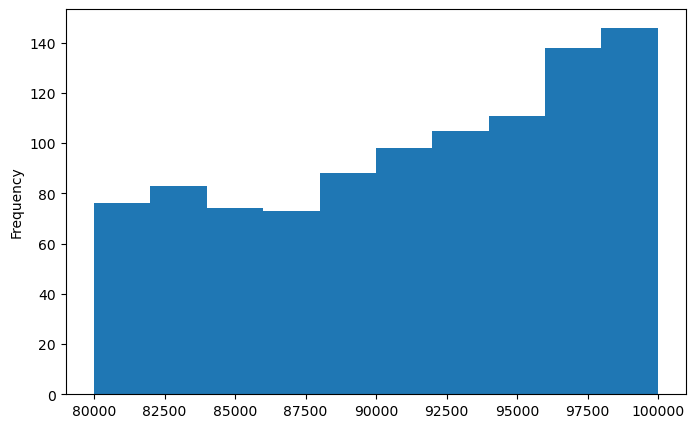

In [28]:
# lets define the result by plotting a historgram of the balance column 

df2['Balance'].plot(kind='hist', figsize=(8,5))

In [29]:
# Pandas has Groupby() function which is a versatile and easy to use function that helps to get an overview of the data. 
# group the rows based on the geography and gender columns and should give us the average churn rate for each group. 

df[['Geography', 'Gender', 'Exited']].groupby(['Geography','Gender']).mean()

Exited
Geography Gender          
France    Female  0.203375
          Male    0.127598
Germany   Female  0.375845
          Male    0.277863
Spain     Female  0.212316
          Male    0.131598

In [30]:
# Applying multiple aggregate functions with groupby(). 
# the agg() allows applying multiple aggregate functions on the groups. A list of functions is passed as an argument. 

df[['Geography', 'Gender', 'Exited']].groupby(['Geography', 'Gender']).agg(['mean', 'count'])

Exited      
                      mean count
Geography Gender                
France    Female  0.203375  2252
          Male    0.127598  2743
Germany   Female  0.375845  1184
          Male    0.277863  1310
Spain     Female  0.212316  1088
          Male    0.131598  1383

In [31]:
# Applying different aggregate functions to different groups 

# we may want to see the average balance and total number of customers churned in each country 
# we'll pass a dictionary which indicates which functions are to be applied to which columns 

df_summary = df[['Geography', 'Exited', 'Balance']].groupby('Geography').agg({'Exited':'sum', 'Balance': 'mean'})
df_summary.rename(columns={'Exited':'# churned customers', 'Balance':'Average Balance of Customers'}, inplace=True)
df_summary

,# churned customers,Average Balance of Customers
Geography,,
France,808.0,62170.517423
Germany,809.0,119701.761820
Spain,413.0,61919.610923


In [34]:
# Reset the index of the pandas dataframe 
# the index of the dataframes that the groupby returns consist of the group names. We can change it by resetting the index. 

df_new = df[['Geography', 'Exited', 'Balance']].groupby(['Geography','Exited']).mean().reset_index()
df_new

,Geography,Exited,Balance
0,France,0.0,60461.614865
1,France,1.0,71025.932042
2,Germany,0.0,119404.193335
3,Germany,1.0,120321.542905
4,Spain,0.0,59793.655991
5,Spain,1.0,72513.352446


In [35]:
# add a new column to the Pandas dataframe 
group = np.random.randint(10, size=6)
df_new['Group'] = group 
df_new

,Geography,Exited,Balance,Group
0,France,0.0,60461.614865,6
1,France,1.0,71025.932042,4
2,Germany,0.0,119404.193335,8
3,Germany,1.0,120321.542905,7
4,Spain,0.0,59793.655991,4
5,Spain,1.0,72513.352446,7


In [37]:
# where() in pandas is ised to replace the values in rows or columns based on a condition. The default replacement value is NaN
# but we can specify the value to be kept as replacement. 

# we can consider a dataframe in the previous step (df_new), we can set the balance for customers to 0 who belong to a group 
# less than 6 

df_new['Balance'] = df_new['Balance'].where(df_new['Group'] > 6, 0)
df_new

,Geography,Exited,Balance,Group
0,France,0.0,0.000000,6
1,France,1.0,0.000000,4
2,Germany,0.0,119404.193335,8
3,Germany,1.0,120321.542905,7
4,Spain,0.0,0.000000,4
5,Spain,1.0,72513.352446,7


In [38]:
# Rank() function in Pandas dataframe, it assigns a rank to the values. 
# lets create a column which ranks the customers according to their balances. 

df_new['rank'] = df_new['Balance'].rank(method='first', ascending=False).astype('int')
df_new

,Geography,Exited,Balance,Group,rank
0,France,0.0,0.000000,6,4
1,France,1.0,0.000000,4,5
2,Germany,0.0,119404.193335,8,2
3,Germany,1.0,120321.542905,7,1
4,Spain,0.0,0.000000,4,6
5,Spain,1.0,72513.352446,7,3


In [39]:
# Determine the unique values of the column 

df.Geography.value_counts().size

# check the unique values in the column using the nunique function
df.Geography.nunique()

3

In [40]:
# Replacing values 

# The replace() function can be used to replace values in a dataframe 

df_new['Group'].replace(0, 'B1')

0    6
1    4
2    8
3    7
4    4
5    7
Name: Group, dtype: int32

In [41]:
df_new['Group'].replace({0:'B1', 1:'B2'})

0    6
1    4
2    8
3    7
4    4
5    7
Name: Group, dtype: int32

<AxesSubplot:title={'center':'Customer Balance'}, ylabel='Frequency'>

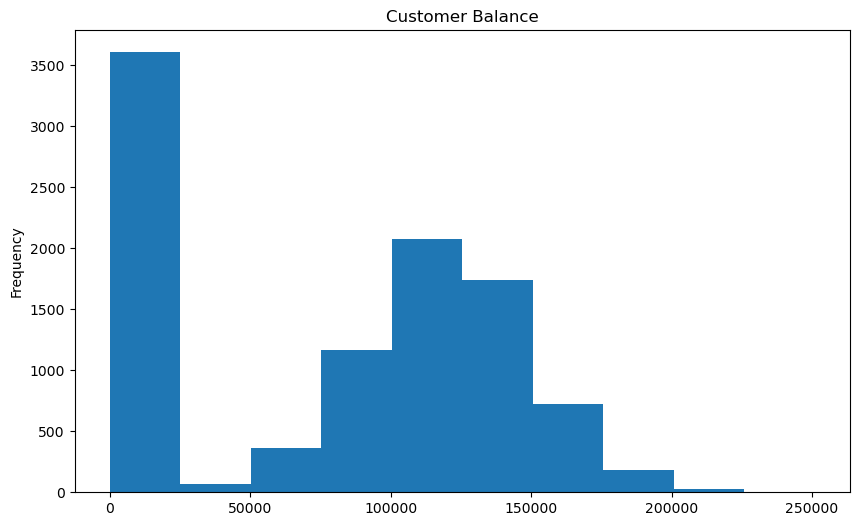

In [42]:
# Create a historgram of the customer balance column 

df['Balance'].plot(kind='hist', figsize=(10, 6), 
                  title='Customer Balance')

In [46]:
# Filtering based on strings 

# we may need to filter rows based on textual data such as number of customers, retrieving churned customer details by geography. 
# lets select the rows in which Geography name starts with 'Fr/Sp' 
df_new
df_new[df_new.Geography.str.startswith('Sp')]


,Geography,Exited,Balance,Group,rank
4,Spain,0.0,0.000000,4,6
5,Spain,1.0,72513.352446,7,3


In [48]:
# styling a pandas dataframe

# we can achieve this by using Style property which returns a styler object. It provides many options for formatting and displaying 
# dataframes. 
# For instance, we can highlight the minimum and maximum values.
# it also allows for applying custom styling functions. 

df_new.style.highlight_max(axis=0, color='red')

,Geography,Exited,Balance,Group,rank
0,France,0.000000,0.000000,6,4
1,France,1.000000,0.000000,4,5
2,Germany,0.000000,119404.193335,8,2
3,Germany,1.000000,120321.542905,7,1
4,Spain,0.000000,0.000000,4,6
5,Spain,1.000000,72513.352446,7,3
